# Pipeline EEG ERP - analysis , Biosemi format

In [1]:
import mne
import os
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

### Reading the raw file

In [2]:
#make a loop on the participants list 
filepath = "C:\\Users\\sophie\\Documents\\DCP\\2023\\pipeline_EEG"
myfile = "sujet5_data.bdf"

In [3]:
#reading and loading the data
filename =  os.path.join(filepath, myfile)
raw = mne.io.read_raw_bdf(filename)
raw.load_data() #needed to process the data

Extracting EDF parameters from C:\Users\sophie\Documents\DCP\2023\pipeline_EEG\sujet5_data.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 1460735  =      0.000 ...  2852.998 secs...


<RawEDF | sujet5_data.bdf, 74 x 1460736 (2853.0 s), ~824.8 MB, data loaded>

In [4]:
#checking data dimensions
print(raw)

<RawEDF | sujet5_data.bdf, 74 x 1460736 (2853.0 s), ~824.8 MB, data loaded>


In [5]:
#getting more info from the dataset
print(raw.info)
# MNE mistakes extra channels as EEG channel (here 73, instead og 64)
# it is better to change the channel type right away to avoid issues (like when re-referencing for instance)

<Info | 7 non-empty values
 bads: []
 ch_names: 1-Fp1, 1-AF7, 1-AF3, 1-F1, 1-F3, 1-F5, 1-F7, 1-FT7, 1-FC5, ...
 chs: 73 EEG, 1 Stimulus
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 104.0 Hz
 meas_date: 2023-03-27 15:16:29 UTC
 nchan: 74
 projs: []
 sfreq: 512.0 Hz
>


### drop, rename channels & mark bad channels  

In [6]:
#rename the channel names : remove the '1-'
print(raw.info.ch_names)

['1-Fp1', '1-AF7', '1-AF3', '1-F1', '1-F3', '1-F5', '1-F7', '1-FT7', '1-FC5', '1-FC3', '1-FC1', '1-C1', '1-C3', '1-C5', '1-T7', '1-TP7', '1-CP5', '1-CP3', '1-CP1', '1-P1', '1-P3', '1-P5', '1-P7', '1-P9', '1-PO7', '1-PO3', '1-O1', '1-Iz', '1-Oz', '1-POz', '1-Pz', '1-CPz', '1-Fpz', '1-Fp2', '1-AF8', '1-AF4', '1-AFz', '1-Fz', '1-F2', '1-F4', '1-F6', '1-F8', '1-FT8', '1-FC6', '1-FC4', '1-FC2', '1-FCz', '1-Cz', '1-C2', '1-C4', '1-C6', '1-T8', '1-TP8', '1-CP6', '1-CP4', '1-CP2', '1-P2', '1-P4', '1-P6', '1-P8', '1-P10', '1-PO8', '1-PO4', '1-O2', '1-rEAR', '1-lEAR', '1-index', '1-EXG4', '1-EXG5', '1-EXG6', '1-EXG7', '1-EXG8', '1-GSR1', 'Status']


In [7]:
channel_renaming_dict = {name: name.replace("1-", "") for name in raw.ch_names}
_ = raw.rename_channels(channel_renaming_dict)  # happens in-place

In [8]:
print(raw.info.ch_names)

['Fp1', 'AF7', 'AF3', 'F1', 'F3', 'F5', 'F7', 'FT7', 'FC5', 'FC3', 'FC1', 'C1', 'C3', 'C5', 'T7', 'TP7', 'CP5', 'CP3', 'CP1', 'P1', 'P3', 'P5', 'P7', 'P9', 'PO7', 'PO3', 'O1', 'Iz', 'Oz', 'POz', 'Pz', 'CPz', 'Fpz', 'Fp2', 'AF8', 'AF4', 'AFz', 'Fz', 'F2', 'F4', 'F6', 'F8', 'FT8', 'FC6', 'FC4', 'FC2', 'FCz', 'Cz', 'C2', 'C4', 'C6', 'T8', 'TP8', 'CP6', 'CP4', 'CP2', 'P2', 'P4', 'P6', 'P8', 'P10', 'PO8', 'PO4', 'O2', 'rEAR', 'lEAR', 'index', 'EXG4', 'EXG5', 'EXG6', 'EXG7', 'EXG8', 'GSR1', 'Status']


In [9]:
# drop channel because we are not interested in them and to reduce the size of the data
to_drop = ['EXG4', 'EXG5', 'EXG6', 'EXG7', 'EXG8']
raw.drop_channels(to_drop) 

<RawEDF | sujet5_data.bdf, 69 x 1460736 (2853.0 s), ~769.0 MB, data loaded>

In [10]:
## Channel names and types https://mne.tools/stable/auto_tutorials/evoked/30_eeg_erp.html

## In practice it is quite common to have some channels labeled as EEG that are actually 
## EOG channels. Raw objects have a set_channel_types() method that can be used to change 
## channel that is mislabeled as eeg to eog...
## https://mne.tools/stable/auto_tutorials/raw/10_raw_overview.html#sphx-glr-auto-tutorials-raw-10-raw-overview-py
## allowed types are ecg, eeg, emg, eog, exci, ias, misc, resp, seeg, dbs, stim, syst, ecog, hbo, hbr

raw.set_channel_types(dict.fromkeys(['rEAR', 'lEAR'],'misc')) 
raw.set_channel_types(dict.fromkeys(['index','GSR1'],'emg'))
raw.set_channel_types(dict.fromkeys(['Status'],'stim'))

C:\Users\sophie\AppData\Local\Temp\ipykernel_16464\4109589738.py:9: RuntimeWarning: The unit for channel(s) lEAR, rEAR has changed from V to NA.
  raw.set_channel_types(dict.fromkeys(['rEAR', 'lEAR'],'misc'))
C:\Users\sophie\AppData\Local\Temp\ipykernel_16464\4109589738.py:11: RuntimeWarning: The unit for channel(s) Status has changed from NA to V.
  raw.set_channel_types(dict.fromkeys(['Status'],'stim'))


<RawEDF | sujet5_data.bdf, 69 x 1460736 (2853.0 s), ~769.0 MB, data loaded>

Using matplotlib as 2D backend.


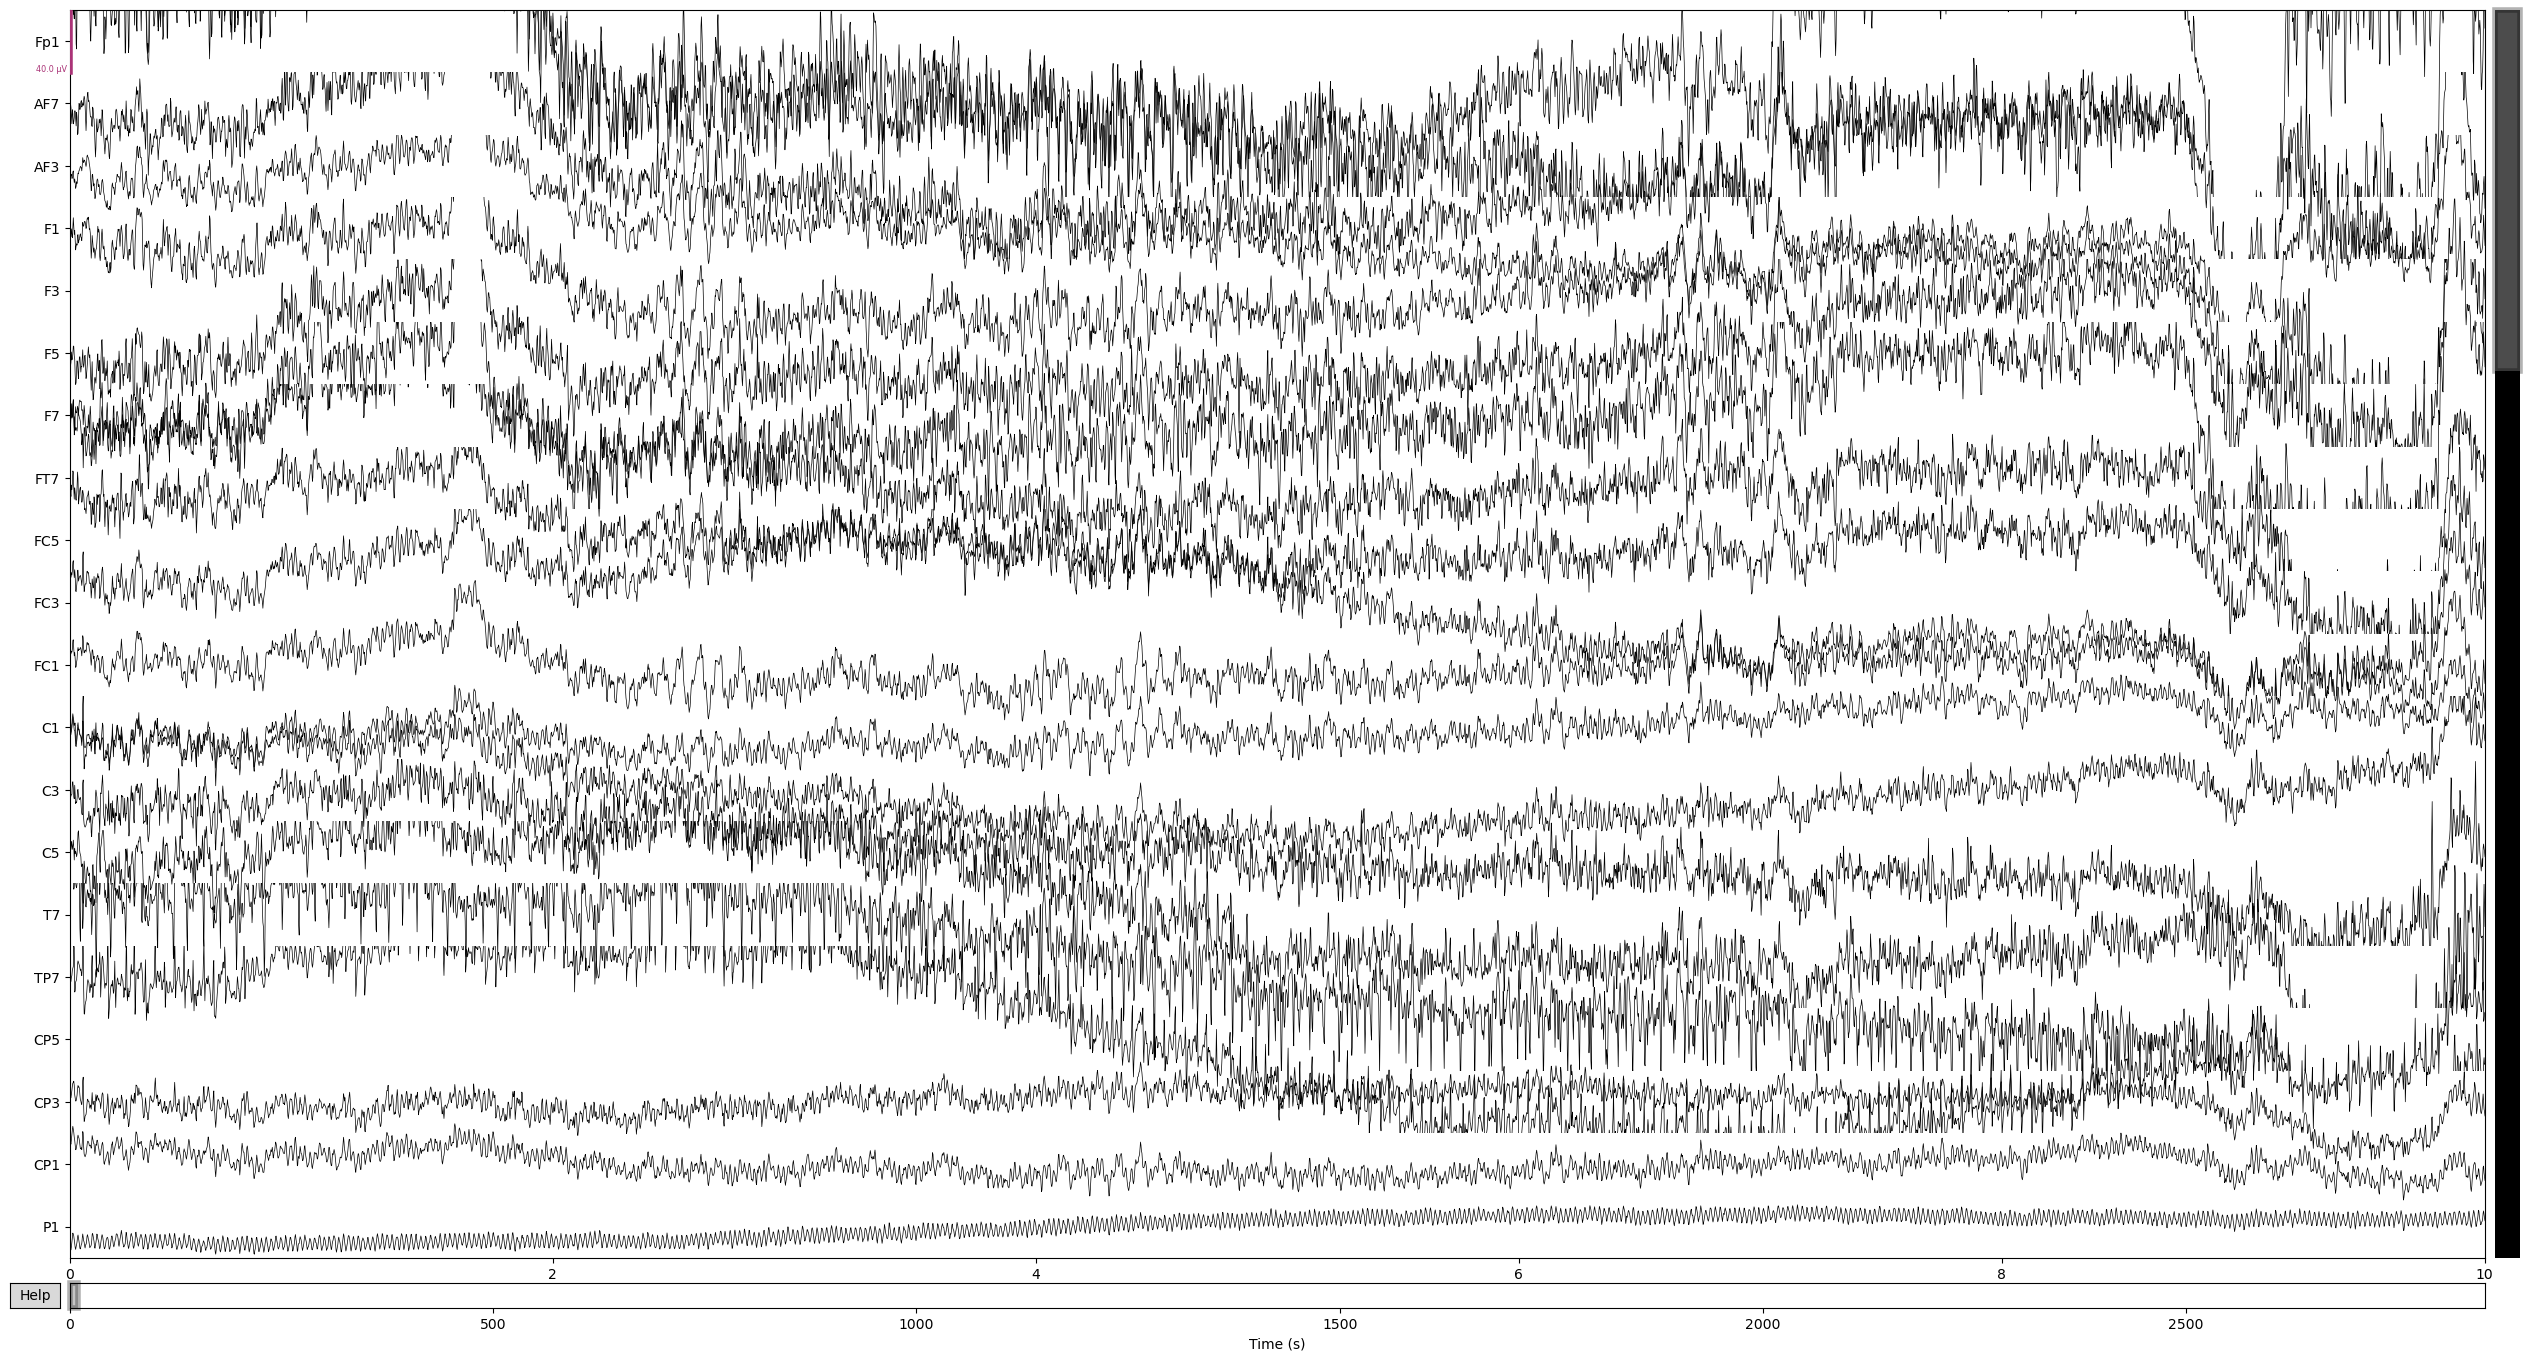

Channels marked as bad:
['P2']


In [11]:
#setting bad channel is mandatory prior referencing (particularly with average referencing)
%matplotlib qt 
raw.plot()
#raw.plot_sources(raw, show_scrollbars=True)

In [12]:
#selecting the channel window marks it as bad make sure to close the window so that the selection is taken into account
#let's check
print(raw.info["bads"])

['P2']


### rereference EEG data

In [13]:
raw.set_eeg_reference(ref_channels=['lEAR', 'rEAR']) #raw_reref = 

EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.


<RawEDF | sujet5_data.bdf, 69 x 1460736 (2853.0 s), ~769.0 MB, data loaded>

In [15]:
montage = mne.channels.make_standard_montage('biosemi64')
#fig = montage.plot()
#fig.savefig(os.path.join(eegdir,"montage.png"))
raw.set_montage(montage, on_missing='warn')

<RawEDF | sujet5_data.bdf, 69 x 1460736 (2853.0 s), ~769.1 MB, data loaded>

In [16]:
#channels selection definition
picks = mne.pick_types(raw.info, eeg=True,
                       stim=False, exclude='bads') # pick channel that we want

### data segmentation 

In [37]:
tmin = -0.1  # start of each epoch (500ms before the trigger)
tmax = 1.5  # end of each epoch (2000ms after the trigger)
baseline = (-0.1, 0) 

In [57]:
#search events in the file
events = mne.find_events(raw, stim_channel='Status')

Trigger channel has a non-zero initial value of 65536 (consider using initial_event=True to detect this event)
Removing orphaned offset at the beginning of the file.
604 events found
Event IDs: [  1   2   3   4  51  52  55  61  62 101 102 103 104 111 112 113 114 121
 122 123 124]


In [ ]:
#choice of events of interest
event_id = [101,102,103,104]

In [77]:
#data segmentation accordingly to the events of interest
epochs = mne.Epochs(raw, events, event_id, tmin, tmax,
                    picks=picks, baseline=baseline, preload = True) # pick what we want, correct by baseline, and reject what we don't want # nothing is reject but register n the mepmory

Not setting metadata
144 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 144 events and 820 original time points ...
0 bad epochs dropped


In [78]:

#as downsampling raw data effectively jitters trigger timings. 
#It is generally recommended not to epoch downsampled data, 
#but instead epoch and then downsample, as epoching downsampled data jitters triggers. 
#For more, see this illustrative gist.
#If resampling the continuous data is desired, 
#it is recommended to construct events using the original data. 
epochs.resample(300) 

<Epochs |  144 events (all good), -0.0996094 – 1.49706 s, baseline -0.1 – 0 s, ~33.3 MB, data loaded,
 '101': 36
 '102': 36
 '103': 36
 '104': 36>

In [64]:
# filtering the data
bandpass_filt = raw.copy().filter(h_freq=40, l_freq=1)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 1691 samples (3.303 s)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  64 out of  64 | elapsed:    2.9s finished


Not setting metadata
604 matching events found
Setting baseline interval to [-0.19921875, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


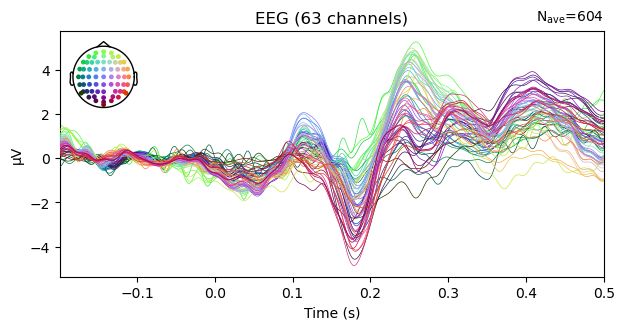

In [65]:
#%matplotlib inline 
#let's visualize the evoked response prior removing eye movement artefacts
#epochs_fig = mne.Epochs(bandpass_filt, events=events).average().plot(picks = picks)

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


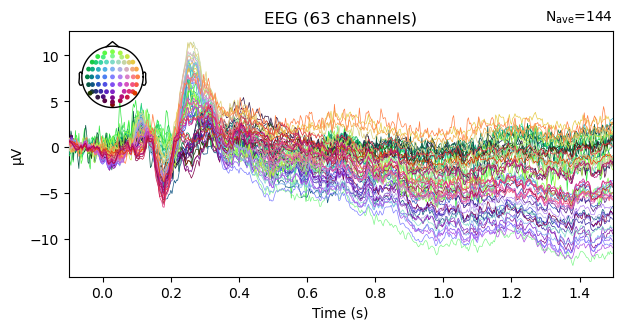

In [116]:
fig =epochs.average().plot()

### rejecting blink (and EKG if present), using ICA

In [24]:
#computing ICA on EEG data
#ideally it is more efficient to remove the artefacts (movement for instance first)
#resample the data 

#n_components can be the number of channels or lower  

ica = mne.preprocessing.ICA(n_components=len(picks), random_state=97, max_iter=800)


Fitting ICA to data using 63 channels (please be patient, this may take a while)
Selecting by number: 63 components
Fitting ICA took 191.1s.


In [68]:
#let's process ICA on resample data to save computation time
# at least a high pass filter at 1 Hz is required prior computing ICA, the low pass filtering is optional
bandpass_filt.resample(300)


Trigger channel has a non-zero initial value of 65536 (consider using initial_event=True to detect this event)
Removing orphaned offset at the beginning of the file.
604 events found
Event IDs: [  1   2   3   4  51  52  55  61  62 101 102 103 104 111 112 113 114 121
 122 123 124]
Trigger channel has a non-zero initial value of 65536 (consider using initial_event=True to detect this event)
Removing orphaned offset at the beginning of the file.
604 events found
Event IDs: [  1   2   3   4  51  52  55  61  62 101 102 103 104 111 112 113 114 121
 122 123 124]


<RawEDF | sujet5_data.bdf, 69 x 855900 (2853.0 s), ~450.6 MB, data loaded>

In [121]:
#ICA on resample data took approximately 130 s
ica_data_resample = ica.fit(bandpass_filt)


Fitting ICA to data using 63 channels (please be patient, this may take a while)
Selecting by number: 63 components
Fitting ICA took 130.4s.


Creating RawArray with float64 data, n_channels=63, n_times=855900
    Range : 0 ... 855899 =      0.000 ...  2852.997 secs
Ready.


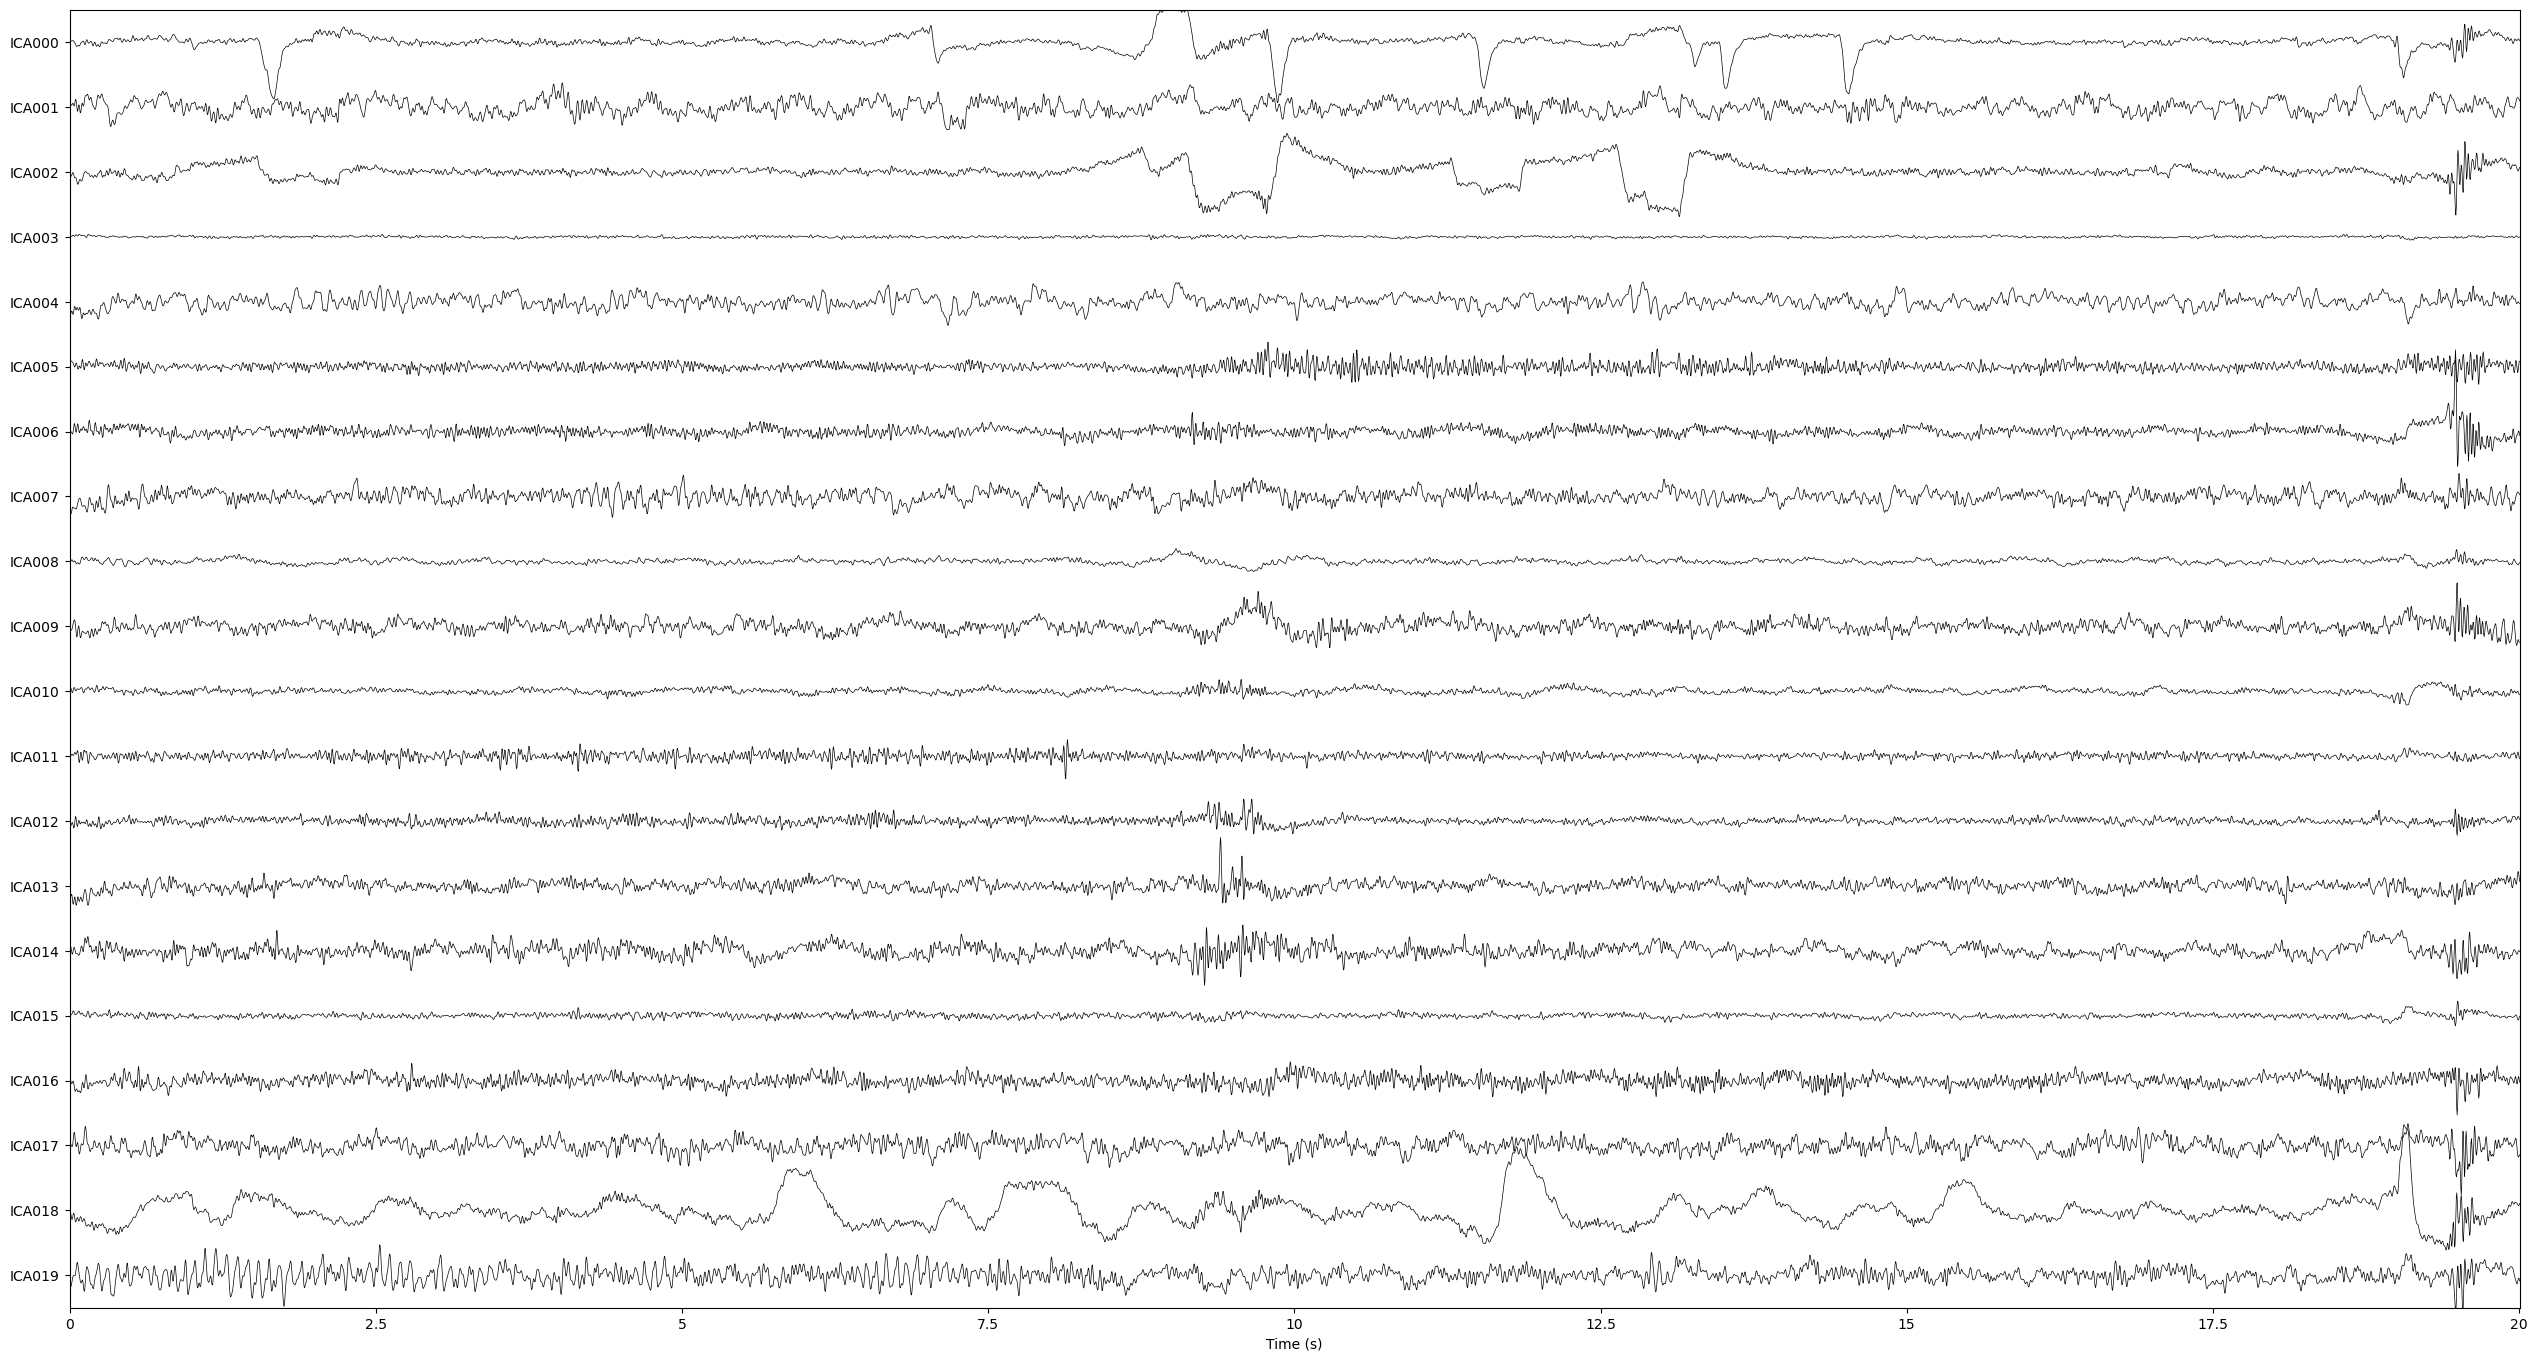

In [148]:
fig = ica_data_resample.plot_sources(bandpass_filt, show_scrollbars=False)

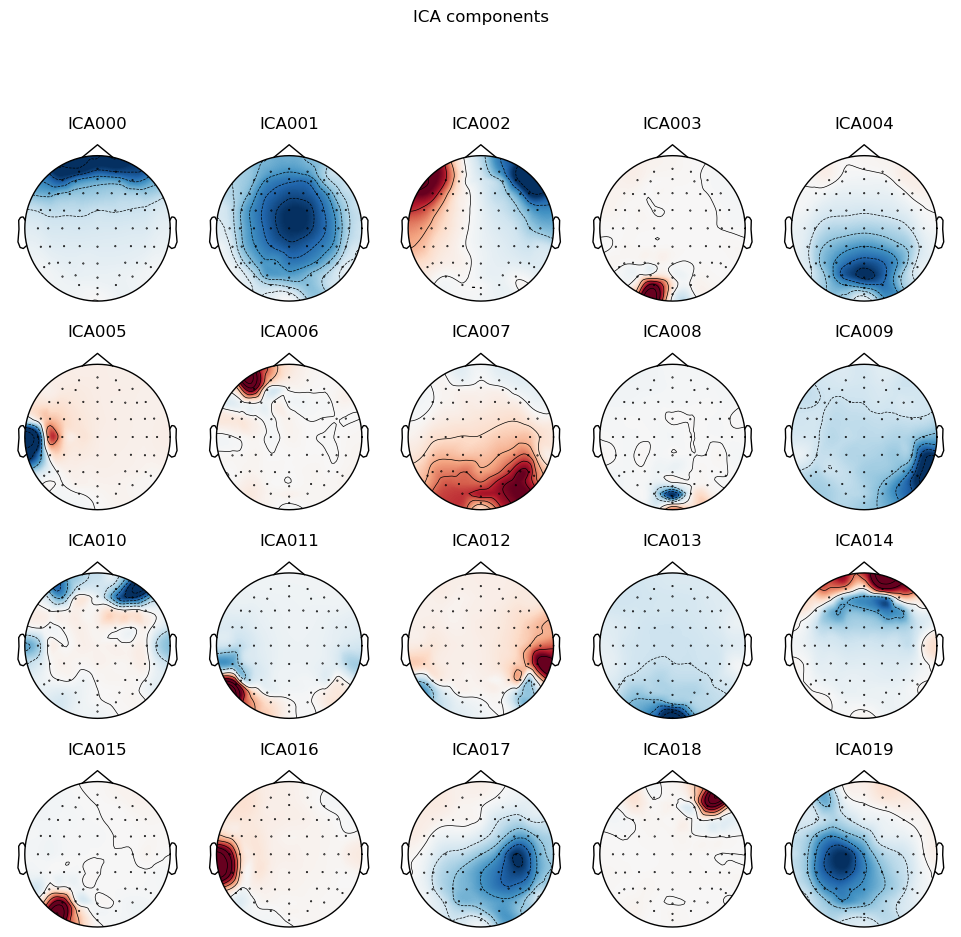

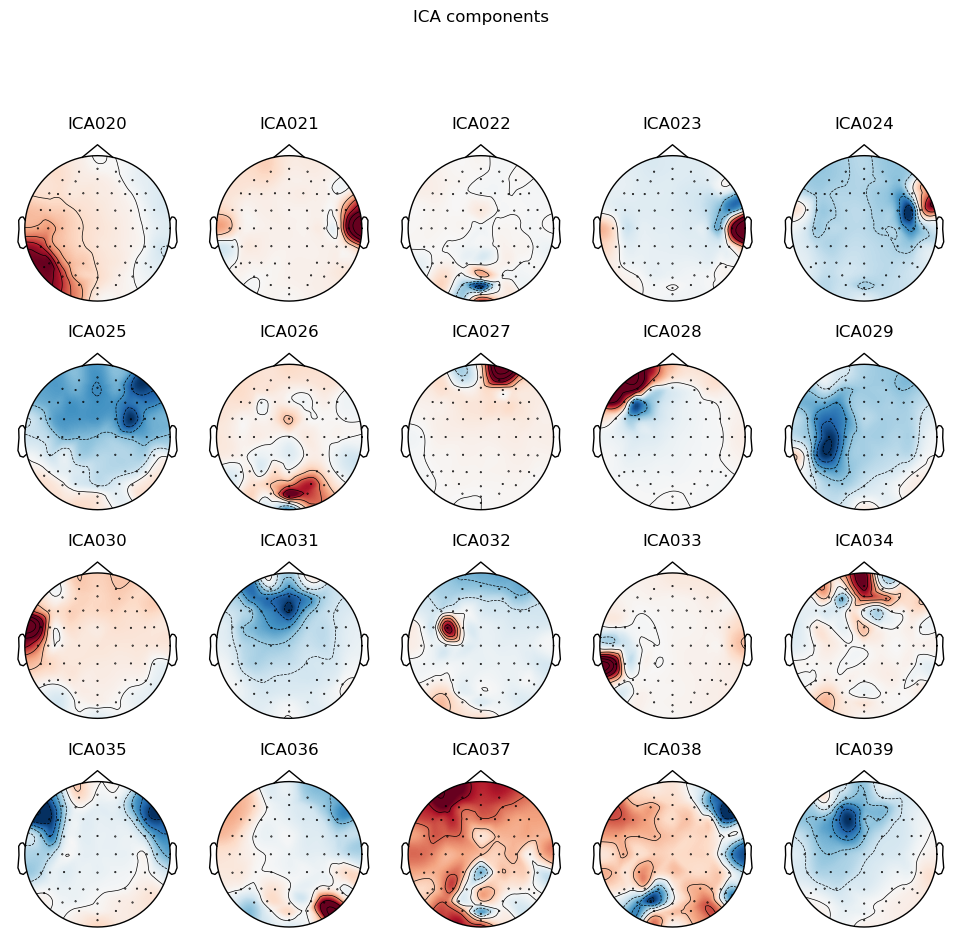

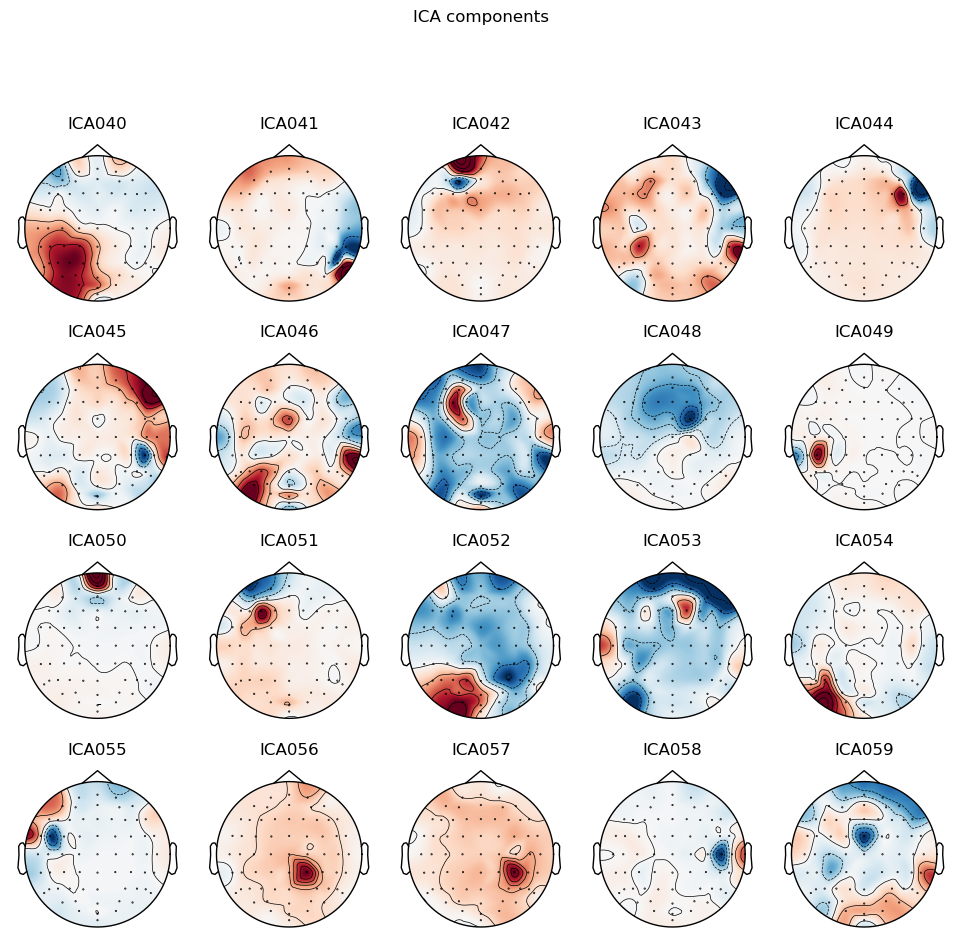

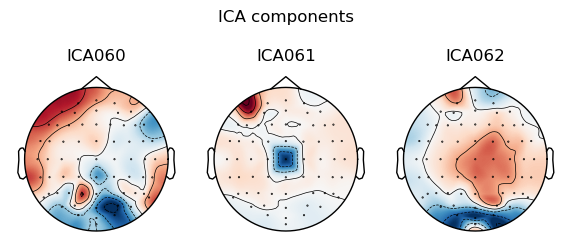

[<MNEFigure size 975x967 with 20 Axes>,
 <MNEFigure size 975x967 with 20 Axes>,
 <MNEFigure size 975x967 with 20 Axes>,
 <MNEFigure size 585x260.5 with 3 Axes>]

In [122]:
ica_data_resample.plot_components()

In [34]:
#ICA000 = blink
#ICA002 = saccade 
ica.exclude = [0,2]

In [35]:
ica.apply(bandpass) #rejecting the ICA components which are eye movement related

Applying ICA to Raw instance
    Transforming to ICA space (63 components)
    Zeroing out 2 ICA components
    Projecting back using 63 PCA components


<RawEDF | sujet5_data.bdf, 69 x 855900 (2853.0 s), ~450.6 MB, data loaded>

### let's project the ICA components on the epochs data =  epoching the ICA components based on the events

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


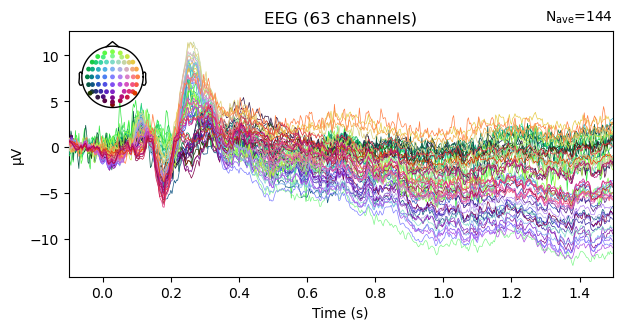

In [147]:
#applying averaging on the epoch data
avg = epochs.average();
fig = avg.plot()


In [ ]:
#saving the average data :  note that the file for evoked has to end with -ave.fif
myfile = 'ICA_evoked-ave.fif';
filename =  os.path.join(filepath, myfile)
avg.save(filename, overwrite=False, verbose=None)

#### components ICA001 and ICA004 show interesting topography 

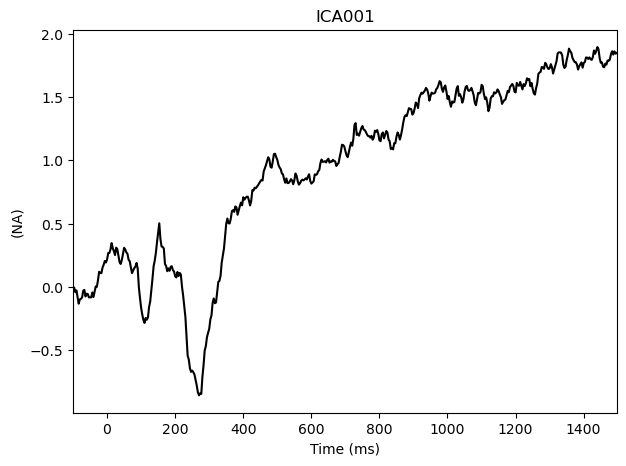

In [149]:
#plottting the evoked response on ICA001 and ICA004
fig = ica_data_resample.plot_sources(avg,title = "ICA001",show_scrollbars=False,picks =[1])

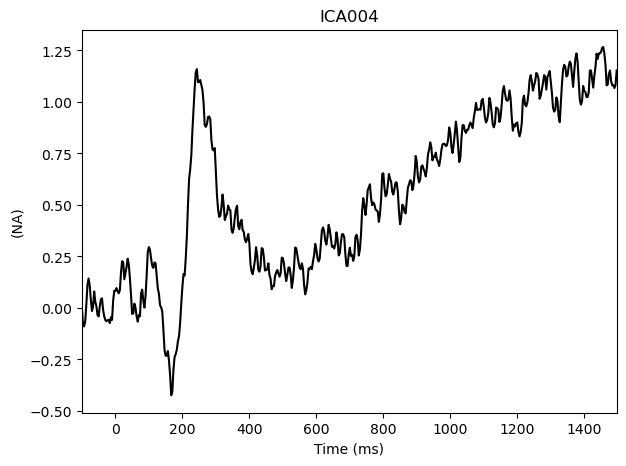

In [139]:
fig = ica_data_resample.plot_sources(avg,title = "ICA004",show_scrollbars=False,picks =[4])